# Exercise 1-5. Compare the singular value distributions for a 1000 × 1000 uni- formly distributed random matrix and a Gaussian random matrix of the same size. Adapt the Gavish–Donoho algorithm to filter uniform noise based on this singular value distribution. Add uniform noise to a data set (either an image or the test low-rank signal) and apply this thresholding algorithm to filter the noise. Vary the magnitude of the noise and compare the results. Is the filtering good or bad?

In [4]:
import numpy as np

# Create a uniformly distributed random matrix
uniform_matrix = np.random.uniform(size=(1000, 1000))

# Create a Gaussian random matrix
gaussian_matrix = np.random.randn(1000, 1000)


In [28]:
uniform_singular_values = np.linalg.svd(uniform_matrix, compute_uv=False)
# print("Uniform singular values: {}".format(uniform_singular_values))
gaussian_singular_values = np.linalg.svd(gaussian_matrix, compute_uv=False)
# print("Gaussian singular values: {}".format(gaussian_singular_values))

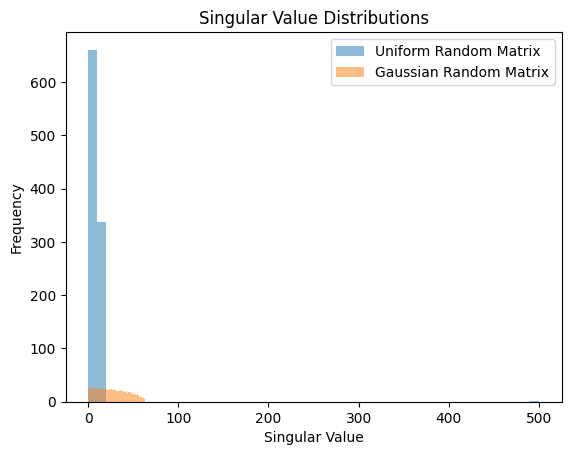

In [6]:
import matplotlib.pyplot as plt

# Create histograms of singular values
plt.hist(uniform_singular_values, bins=50, alpha=0.5, label='Uniform Random Matrix')
plt.hist(gaussian_singular_values, bins=50, alpha=0.5, label='Gaussian Random Matrix')
plt.legend()
plt.title('Singular Value Distributions')
plt.xlabel('Singular Value')
plt.ylabel('Frequency')
plt.show()


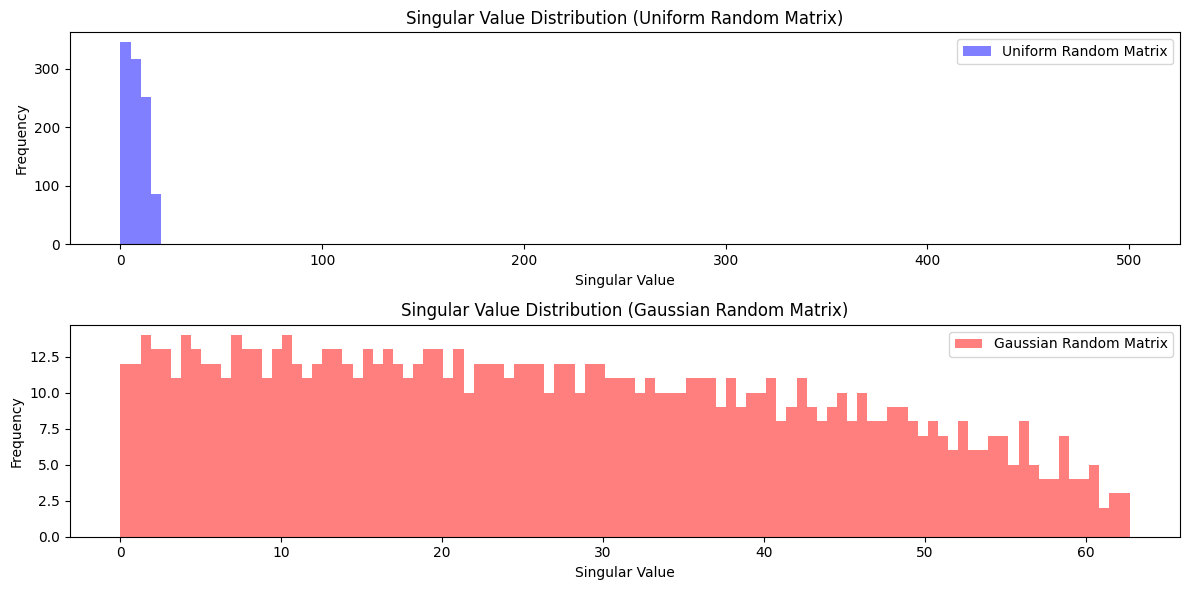

In [36]:
# Visualize the singular value distributions using histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(uniform_singular_values, bins=100, alpha=0.5, color='b', label='Uniform Random Matrix')
plt.title('Singular Value Distribution (Uniform Random Matrix)')
plt.xlabel('Singular Value')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(gaussian_singular_values, bins=100, alpha=0.5, color='r', label='Gaussian Random Matrix')
plt.title('Singular Value Distribution (Gaussian Random Matrix)')
plt.xlabel('Singular Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

In [8]:
def gavish_donoho_thresholding(singular_values, threshold, svd_u, svd_vt):
    # Thresholding: set singular values below the threshold to zero
    thresholded_singular_values = np.maximum(0, singular_values - threshold)
    
    # Reconstruct the filtered signal using the thresholded singular values
    filtered_signal = np.dot(np.dot(svd_u, np.diag(thresholded_singular_values)), svd_vt)
    
    return filtered_signal


In [20]:
# Example: Create a synthetic low-rank signal
true_signal = np.random.randn(1000, 1)  # The original signal without noise
noise_magnitude = 3  # Adjust the noise magnitude as needed
uniform_noise = np.random.uniform(low=-noise_magnitude, high=noise_magnitude, size=(1000, 1))
noisy_signal = true_signal + uniform_noise  # Signal with added uniform noise

In [21]:
# Set the threshold value (you can experiment with different values)
threshold_value = 0.1
U, S, Vt = np.linalg.svd(noisy_signal, full_matrices=False)
U.shape
# Apply thresholding to noisy_signal
filtered_signal = gavish_donoho_thresholding(S, threshold_value, U, Vt)


In [22]:
filtered_signal.shape

(1000, 1)

Mean Squared Error (MSE): 3.12615273065341


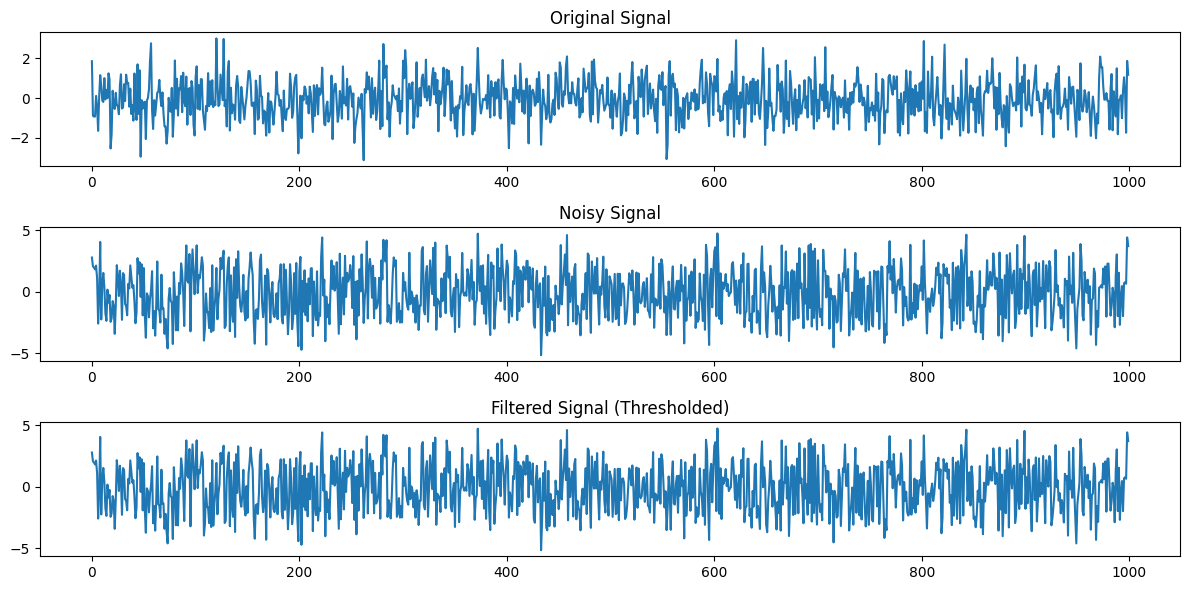

In [23]:
# Calculate Mean Squared Error (MSE) between the true and filtered signals
mse = np.mean((true_signal - filtered_signal) ** 2)

# Plot the original signal, noisy signal, and filtered signal for evaluation
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(true_signal, label='Original Signal')
plt.title('Original Signal')
plt.subplot(3, 1, 2)
plt.plot(noisy_signal, label='Noisy Signal')
plt.title('Noisy Signal')
plt.subplot(3, 1, 3)
plt.plot(filtered_signal, label='Filtered Signal')
plt.title('Filtered Signal (Thresholded)')
plt.tight_layout()

# Display the MSE value
print(f'Mean Squared Error (MSE): {mse}')

plt.show()